In [12]:
import requests
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from io import StringIO





In [13]:
# Database connection parameters
db_params = {
    "dbname": "space_debris_tracker_db",
    "user": "postgres",
    "password": "your_new_password",
    "host": "localhost", 
    "port": "5432"
}

# Establish connection
try:
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    print("Connected to PostgreSQL successfully!")
except Exception as e:
    print("Error connecting to PostgreSQL:", e)

Connected to PostgreSQL successfully!


In [14]:
import requests
import json

# Space-Track login URL and API endpoint
login_url = "https://www.space-track.org/ajaxauth/login"
debris_api = "https://www.space-track.org/basicspacedata/query/class/satcat/format/json"
USERNAME = 'melicontreras32@gmail.com'
PASSWORD = 'MelicarrGrandma!'

# Create a session
session = requests.Session()


# Define headers
headers = {
    "Content-Type": "application/x-www-form-urlencoded",
    "User-Agent": "Mozilla/5.0"
}

# Define login payload
login_payload = {
    "identity": USERNAME,
    "password": PASSWORD
}

# Perform login request
login_response = session.post(login_url, data=login_payload, headers=headers)

# Debugging: Print login response
print(f"Login Response Code: {login_response.status_code}")
print(f"Login Response Text: {login_response.text}")

# Check if login was successful
if login_response.status_code == 200 and login_response.text.strip():
    print("Login successful.")

    # Fetch data from the API using the session (with stored cookies)
    api_response = session.get(debris_api)

    if api_response.status_code == 200:
        # Parse JSON data
        data = api_response.json()
        print("Data retrieved successfully.")
        
        # Print the first item in the data (for debugging)
        print(json.dumps(data[0], indent=4))
    else:
        print(f"Error fetching data: {api_response.status_code}, {api_response.text}")
else:
    print(f"Login failed: {login_response.status_code}, {login_response.text}")

Login Response Code: 200
Login Response Text: ""
Login successful.
Data retrieved successfully.
{
    "INTLDES": "1957-001A",
    "NORAD_CAT_ID": "1",
    "OBJECT_TYPE": "ROCKET BODY",
    "SATNAME": "SL-1 R/B",
    "COUNTRY": "CIS",
    "LAUNCH": "1957-10-04",
    "SITE": "TTMTR",
    "DECAY": "1957-12-01",
    "PERIOD": "96.19",
    "INCLINATION": "65.10",
    "APOGEE": "938",
    "PERIGEE": "214",
    "COMMENT": null,
    "COMMENTCODE": "4",
    "RCSVALUE": "0",
    "RCS_SIZE": "LARGE",
    "FILE": "1",
    "LAUNCH_YEAR": "1957",
    "LAUNCH_NUM": "1",
    "LAUNCH_PIECE": "A",
    "CURRENT": "Y",
    "OBJECT_NAME": "SL-1 R/B",
    "OBJECT_ID": "1957-001A",
    "OBJECT_NUMBER": "1"
}


In [15]:
query_url = f"{debris_api}/class/satcat/format/csv"

response = session.get(query_url)
    
if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
    df.to_csv("satellite_data.csv", index=False)  
    print("Satellite data saved to satellite_data.csv")

else:
    print(f"Error fetching satellite data: {response.status_code}, {response.text}")


Satellite data saved to satellite_data.csv


In [16]:
# Function to fetch debris data
def fetch_debris_data():
    query_url = f"{debris_api}/class/satcat/OBJECT_TYPE/DEBRIS/format/csv"
    response = session.get(query_url)
    
    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))
        df.to_csv("debris_data.csv", index=False) 
        print("Debris data saved to debris_data.csv")
        return df
    else:
        print(f"Error fetching debris data: {response.status_code}, {response.text}")
        return pd.DataFrame()
    
    # Fetch space debris data and save it
debris_data = fetch_debris_data()

# Check if data was fetched successfully
if not debris_data.empty:
    print(debris_data.head())  
else:
    print("No debris data received.")

C:\Users\MeliC\AppData\Local\Temp\ipykernel_27336\2686411427.py:7: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



Debris data saved to debris_data.csv
     INTLDES  NORAD_CAT_ID OBJECT_TYPE            SATNAME COUNTRY      LAUNCH  \
0  1960-003C            33      DEBRIS  THOR ABLESTAR DEB      US  1960-04-13   
1  1960-005D            37      DEBRIS      SPUTNIK 4 DEB     CIS  1960-05-15   
2  1960-005E            38      DEBRIS      SPUTNIK 4 DEB     CIS  1960-05-15   
3  1960-005F            39      DEBRIS      SPUTNIK 4 DEB     CIS  1960-05-15   
4  1960-005G            40      DEBRIS      SPUTNIK 4 DEB     CIS  1960-05-15   

    SITE       DECAY  PERIOD  INCLINATION  ...  RCSVALUE  RCS_SIZE FILE  \
0  AFETR  1960-07-17   93.59        51.29  ...         0       NaN    1   
1  TTMTR  1961-06-30   92.92        64.89  ...         0       NaN    1   
2  TTMTR  1960-08-20   90.63        64.89  ...         0       NaN    1   
3  TTMTR  1960-09-24   90.99        64.89  ...         0       NaN    1   
4  TTMTR  1960-09-24   92.13        64.89  ...         0       NaN    1   

   LAUNCH_YEAR  LAUNCH_NU

In [17]:
satellite_data = pd.read_csv("satellite_data.csv")
debris_data = pd.read_csv("debris_data.csv")    

engine=create_engine(f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}/{db_params['dbname']}")

satellite_data.to_sql("satellite_data", engine, if_exists="replace", index=False)
debris_data.to_sql("debris_data", engine, if_exists="replace", index=False)

C:\Users\MeliC\AppData\Local\Temp\ipykernel_27336\3988912012.py:2: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



600

C:\Users\MeliC\AppData\Local\Temp\ipykernel_27336\3124363701.py:24: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



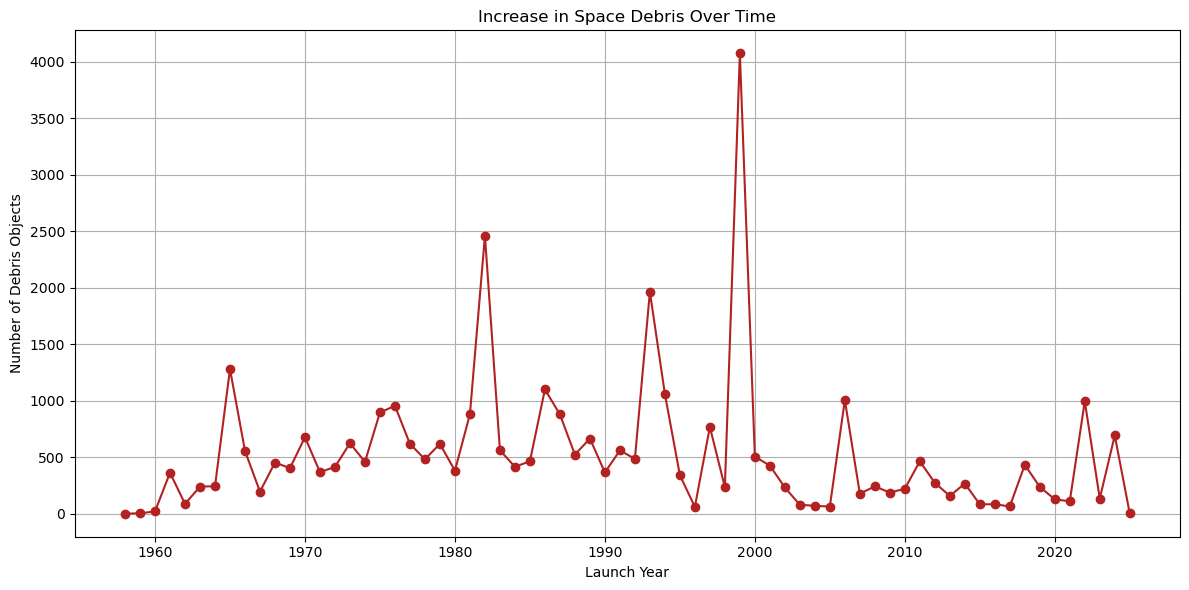

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import kaleido
import plotly.express as px

# Load data
df = pd.read_csv("satellite_data.csv", low_memory=False)
debris_df = pd.read_csv("debris_data.csv", low_memory=False)


# Convert date columns
df["LAUNCH"] = pd.to_datetime(df["LAUNCH"], errors="coerce")
df["DECAY"] = pd.to_datetime(df["DECAY"], errors="coerce")

# Calculate lifespan
df["LIFESPAN_DAYS"] = (df["DECAY"] - df["LAUNCH"]).dt.days
lifespans = df["LIFESPAN_DAYS"].dropna()

# Average lifespan
average_lifespan = lifespans.mean()

debris_df = pd.read_csv("debris_data.csv")
debris_df["LAUNCH"] = pd.to_datetime(debris_df["LAUNCH"], errors="coerce")
debris_df["LAUNCH_YEAR"] = debris_df["LAUNCH"].dt.year

debris_by_year = debris_df["LAUNCH_YEAR"].value_counts().sort_index()

# Create output folder if needed
os.makedirs("static/images", exist_ok=True)

# --- Visualization 1: Space Deris Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(debris_by_year.index, debris_by_year.values, marker='o', color='firebrick')
plt.title("Increase in Space Debris Over Time")
plt.xlabel("Launch Year")
plt.ylabel("Number of Debris Objects")
plt.grid(True)
plt.tight_layout()

# --- Visualization 2: Lifespan Gauge Chart ---
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=average_lifespan,
    title={'text': "Average Satellite Lifespan (Days)"},
    gauge={
        'axis': {'range': [0, 8000]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 1000], 'color': "#d6eaf8"},
            {'range': [1000, 3000], 'color': "#aed6f1"},
            {'range': [3000, 5000], 'color': "#5dade2"},
            {'range': [5000, 8000], 'color': "#2e86c1"}
        ]
    }
))